# Sentiment Analysis of Reviews

In [1]:
# Importing all the necessary packages
import pandas
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import model_selection, naive_bayes, svm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reading the data from "car_reviews.csv" into a data frame

In [2]:
# import data from csv file to data frame

dataset = pandas.read_csv('car_reviews.csv', delimiter = ',')
dataset.head()

,Sentiment,Review
0,Neg,In 1992 we bought a new Taurus and we really ...
1,Neg,The last business trip I drove to San Franci...
2,Neg,My husband and I purchased a 1990 Ford F250 a...
3,Neg,I feel I have a thorough opinion of this truc...
4,Neg,AS a mother of 3 all of whom are still in ca...


In [3]:
# Dataset info

dataset.info()
print()
dataset.Sentiment.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  1382 non-null   object
 1   Review     1382 non-null   object
dtypes: object(2)
memory usage: 21.7+ KB



Pos    691
Neg    691
Name: Sentiment, dtype: int64

In [4]:
# Assigning 0 to Neg and 1 to Pos in Sentiment column

sentiment = {'Neg': 0,'Pos': 1}
dataset.Sentiment = [sentiment[item] for item in dataset.Sentiment]
dataset.head()

,Sentiment,Review
0,0,In 1992 we bought a new Taurus and we really ...
1,0,The last business trip I drove to San Franci...
2,0,My husband and I purchased a 1990 Ford F250 a...
3,0,I feel I have a thorough opinion of this truc...
4,0,AS a mother of 3 all of whom are still in ca...


In [5]:
dataset.info()
print()
dataset.Sentiment.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  1382 non-null   int64 
 1   Review     1382 non-null   object
dtypes: int64(1), object(1)
memory usage: 21.7+ KB



1    691
0    691
Name: Sentiment, dtype: int64

## Pre-processing the Reviews

text_preprocess() function will perform operations such as:
- removing punctuations
- removing non-letters
- converting strings to lower case
- removing stopwords
- stemming

In [6]:
# Function to perform text pre-processing on the "Review" Column

def text_preprocess(text):
    
    # removing punctuation
    text_wo_punctuation = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove non-letters
    text_letters_only = re.sub("[^a-zA-Z]", " ", text_wo_punctuation)
    
    # convert to lowercase
    text_lower_case = text_letters_only.lower()
    
    # removing stopwords
    text_wo_stopwords = " ".join([word for word in str(text_lower_case).split() if word not in set(stopwords.words('english'))])

    # applying stemming
    stemmer = PorterStemmer()
    text_stem = " ".join([stemmer.stem(word) for word in text_wo_stopwords.split() if len(word) > 2])
    
    return text_stem

### Demostrating text pre-processing of reviews

To perform the text pre-processing of reviews a custom function text_preprocess() is defined which performs operations that are mentioned above section. For demonstration purpose the function is split into further functions:
- demo_text_preprocessing() which removes the punctuation, non-letter characters and conver input text to lowercase
- demo_remove_stopwords() which removes the stopwords present in the input text
- demo_stemming() - performs stemming operation on all the words present in the input text and return words only that are more than 2 charactes

The first 2 reviews from dataset are picked to demonstrate the text-preprocessing are stored in the list `review_list` and passed through the 3 functions mentioned above. Please find the output below which clearly shows the state of a review in different phases of pre-processing.

In [7]:
# Demostration of text pre-processing

def demo_text_preprocessing(text):
    print("Review before text pre-processing:")
    print("----------------------------------\n")
    print(text)
    print()
    
    # removing punctuation
    text_wo_punctuation = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove non-letters
    text_letters_only = re.sub("[^a-zA-Z]", " ", text_wo_punctuation)
    
    # convert to lowercase
    text_lower_case = text_letters_only.lower()
    print()
    
    return text_lower_case

def demo_remove_stopwords(text):
    list_not_stopwords = []
    list_stopwords = []
    print("Review in lowercase with stopwords with removed punctuation, non-letter characters:")
    print("-----------------------------------------------------------------------------------\n")
    print(text)
    print()
    for word in text.split():
        if word not in set(stopwords.words('english')):
            list_not_stopwords.append(word)
        else:
            list_stopwords.append(word)
            
    print("List of stopwords elimated from Review:")
    print("---------------------------------------\n")
    print(list_stopwords)
    print()
    
    print("Review without stopwords before stemming:")
    print("----------------------------------------\n")
    text_wo_stopwords = " ".join(list_not_stopwords)
    print(text_wo_stopwords)
    
    return text_wo_stopwords
    
def demo_stemming(text):
    stemmer = PorterStemmer()
    text_stem = " ".join([stemmer.stem(word) for word in text.split() if len(word) > 2])
    print("Review after stemming:")
    print("----------------------\n")
    print(text_stem)
    
    return text_stem
        
            
review_list = dataset['Review'][0:2].to_list()

review_list_pre_processed = []

for i in review_list:
    print("Text pre-processing being appiled on review: ", str(review_list.index(i)))
    print("===============================================\n")
    interm_text = demo_text_preprocessing(i)
    text_wo_stopwords = demo_remove_stopwords(interm_text)
    print()
    text_stemming = demo_stemming(text_wo_stopwords)
    print()
    review_list_pre_processed.append(text_stemming)
    print()
    print("==========================================================================\n")
    print("==========================================================================\n")


Text pre-processing being appiled on review:  0

Review before text pre-processing:
----------------------------------

 In 1992 we bought a new Taurus and we really loved it  So in 1999 we decided to try a new Taurus  I did not care for the style of the newer version  but bought it anyway I do not like the new car half as much as i liked our other one  Thee dash is much to deep and takes up a lot of room  I do not find the seats as comfortable and the way the sides stick out further than the strip that should protect your card from denting It drives nice and has good pick up  But you can not see the hood at all from the driver seat and judging and parking is difficult  It has a very small gas tank I would not buy a Taurus if I had it to do over  I would rather have my 1992 back  I dont think the style is as nice as the the 1992  and it was a mistake to change the style  In less than a month we had a dead battery and a flat tire 


Review in lowercase with stopwords with removed punctu

The pre-processed reviews are stored in the list `review_list_pre_processed`. `CountVectorizer` is used to generate the `Bag of words` from the selected reviews and the `Bag of words` vector has been represented as a data frame with words and count of their respective occurances.

In [8]:
print("List of Reviews:")
print("----------------\n")
print(review_list_pre_processed)
print()
cv = CountVectorizer()
word_count = cv.fit_transform(review_list_pre_processed)
print("Vocabulary gained from the selected reviews:")
print("--------------------------------------------\n")
print(cv.vocabulary_)
print()
print("countvector 'cv' represent in data frame format:")
print("------------------------------------------------\n")
cv_dataframe = pandas.DataFrame(word_count.toarray(),columns=cv.get_feature_names())
cv_dataframe


List of Reviews:
----------------

['bought new tauru realli love decid tri new tauru care style newer version bought anyway like new car half much like one thee dash much deep take lot room find seat comfort way side stick strip protect card dent drive nice good pick see hood driver seat judg park difficult small ga tank would buy tauru would rather back dont think style nice mistak chang style less month dead batteri flat tire', 'last busi trip drove san francisco went hertz rental got ford tauru think look comfort profession found seat uncomfort well passeng seat comfort may import fuel usag fine car get problem uncomfort ride though hard fit car weigh pound usual quit comfort car tauru seem especi uncomfort anyon think rent car long trip would suggest ford tauru list sure get larg trunk allow pack lot materi need busi end trip drive breez everyth work right complaint standard make car except comfort area import comfort long trip uncomfort driver distract made trip seem unnecessaril

,allow,anoth,anyon,anyway,area,back,basi,batteri,better,bought,...,unnecessarili,usag,usual,version,way,weigh,well,went,work,would
0,0,0,0,1,0,1,0,1,0,2,...,0,0,0,1,1,0,0,0,0,2
1,1,1,1,0,1,0,1,0,1,0,...,1,1,1,0,0,1,1,1,1,2


### text_preprocessing() being applied to 'Review' columm of dataset.

In [9]:
dataset['Clean_Review'] = dataset['Review'].apply(text_preprocess)

In [10]:
dataset

,Sentiment,Review,Clean_Review
0,0,In 1992 we bought a new Taurus and we really ...,bought new tauru realli love decid tri new tau...
1,0,The last business trip I drove to San Franci...,last busi trip drove san francisco went hertz ...
2,0,My husband and I purchased a 1990 Ford F250 a...,husband purchas ford noth problem own vehicl a...
3,0,I feel I have a thorough opinion of this truc...,feel thorough opinion truck compar post evalu ...
4,0,AS a mother of 3 all of whom are still in ca...,mother still carseat logic thing trade minivan...
...,...,...,...
1377,1,In June we bought the Sony Limited Edition Fo...,june bought soni limit edit focu sedan simpli ...
1378,1,After 140 000 miles we decided to replace my...,mile decid replac wife toyota camri found new ...
1379,1,The Ford Focus is a great little record setti...,ford focu great littl record set car first car...
1380,1,I needed a new car because my hyundai excel 9...,need new car hyundai excel decid shop around n...


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sentiment     1382 non-null   int64 
 1   Review        1382 non-null   object
 2   Clean_Review  1382 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.5+ KB


### Splitting dataset into train and test - 80% and 20% respectively

In [12]:
# splitting dataset into train and test

X = dataset['Clean_Review']
y = dataset['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## Using Multinomial Naive Bayes model
CountVectorizer is being used to create numerical feature vector for each document of the `train` reviews.

In [13]:
# creating countvector
countvector = CountVectorizer(max_features=5000)
cv_train_term = countvector.fit_transform(X_train)
cv_test_term = countvector.transform(X_test)

In [14]:
model = MultinomialNB()
model.fit(cv_train_term, y_train)

MultinomialNB()

In [15]:
predictions_train = model.predict(cv_train_term)
predictions_test = model.predict(cv_test_term)
print('Train Accuracy:', round((metrics.accuracy_score(y_train, predictions_train) * 100),2),'%')
print('Test Accuracy:', round((metrics.accuracy_score(y_test, predictions_test) * 100),2),'%')

Train Accuracy: 90.68 %
Test Accuracy: 79.06 %


In [16]:
def plot_confusion_matrix(cm, title):
    group_names = ['True Neg', 'False Pos', 'False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = plt.axes()
    sns.heatmap(cm, ax=ax, annot=labels, fmt='', cmap='Blues')
    ax.set_title(title)
    plt.show()

### Confusion Matrix for Naive Bayes - Train and Test

Confusion Matrix for Naive Bayes Train: 

[[496  66]
 [ 37 506]]



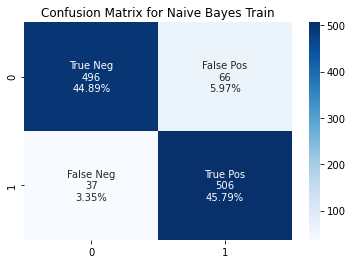

In [17]:
cm_train = confusion_matrix(y_train, predictions_train)
cm_test = confusion_matrix(y_test, predictions_test)

print("Confusion Matrix for Naive Bayes Train: \n")
print(cm_train)
print()
plot_confusion_matrix(cm_train, 'Confusion Matrix for Naive Bayes Train')

Confusion Matrix for Naive Bayes Test: 

[[ 99  30]
 [ 28 120]]



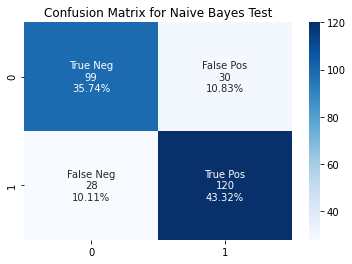

In [18]:
print("Confusion Matrix for Naive Bayes Test: \n")
print(cm_test)
print()
plot_confusion_matrix(cm_test, 'Confusion Matrix for Naive Bayes Test')

## Using Support Vector Machine Model

Comparing other models to `Multinomial Naive Bayes`, I picked `Vector Machine Model` as I learned it has certain advantages to Naive Bayes in case of Sentiment Analysis especially when dealing with full length reviews.

Also `TfidfVectorizer` is being used to vectorze the training reviews.

In [19]:
# Create word vectore of train reviews using tf_idf vectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_train_term = Tfidf_vect.fit_transform(X_train)
Tfidf_test_term = Tfidf_vect.transform(X_test)

In [20]:
model_SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
model_SVM.fit(Tfidf_train_term,y_train)
# predict the labels on validation dataset
predictions_train_SVM = model_SVM.predict(Tfidf_train_term)
predictions_test_SVM = model_SVM.predict(Tfidf_test_term)
# Use accuracy_score function to get the accuracy
print('Train Accuracy:', round((metrics.accuracy_score(y_train, predictions_train_SVM) * 100),2),'%')
print('Test Accuracy:', round((metrics.accuracy_score(y_test, predictions_test_SVM) * 100),2),'%')

Train Accuracy: 96.29 %
Test Accuracy: 80.87 %


### Confusion Matrix for Naive Bayes - Train and Test

Confusion Matrix for Support Vector Machine Train: 

[[535  27]
 [ 14 529]]



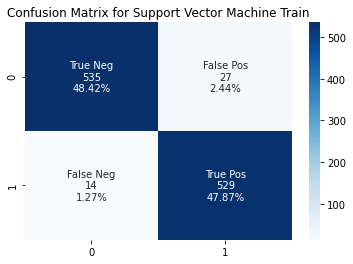

In [21]:
cm_svg_train = confusion_matrix(y_train, predictions_train_SVM)
cm_svg_test = confusion_matrix(y_test, predictions_test_SVM)

print("Confusion Matrix for Support Vector Machine Train: \n")
print(cm_svg_train)
print()
plot_confusion_matrix(cm_svg_train, 'Confusion Matrix for Support Vector Machine Train')

Confusion Matrix for Support Vector Machine Test: 

[[ 97  32]
 [ 21 127]]



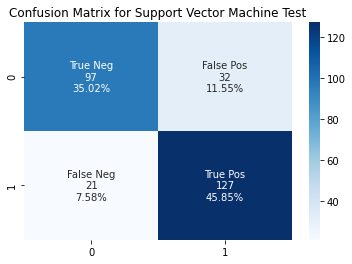

In [22]:
print("Confusion Matrix for Support Vector Machine Test: \n")
print(cm_svg_test)
print()
plot_confusion_matrix(cm_svg_test, 'Confusion Matrix for Support Vector Machine Test')

### References:

1. Sida Wang and Christopher D. Manning, Title. Baselines and Bigrams: Simple, Good Sentiment and Topic Classification [Online]. Available from: https://nlp.stanford.edu/pubs/sidaw12_simple_sentiment.pdf